### **Data Source**
**Reference:** *E. A. Lopez-Rojas, A. Elmir, and S. Axelsson*  
**Title:** *PaySim: A Financial Mobile Money Simulator for Fraud Detection*  
**Conference:** *The 28th European Modeling and Simulation Symposium (EMSS), Larnaca, Cyprus, 2016*  
**Link:** [Kaggle - PaySim Dataset](https://www.kaggle.com/datasets/ealaxi/paysim1)

---

#### **Project Context**
This dataset has been utilized for a university internship project aimed at detecting fraud in bank money transactions. The data was carefully edited and cleaned to fit the specific requirements of the project.

#### **About the Author**
**Name:** El Mouaddibe Zaid  
**Field of Study:** *Computer Science Engineering*  
**Institution:** *University Hassan II - ENSET Mohammadia*  
**Year:** *2024*  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px

In [2]:
# Load the dataset
data = pd.read_csv("data.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head(5)

First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Checking for null values
print("\nChecking for null values in the dataset:")
print(data.isnull().sum())


Checking for null values in the dataset:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
# Information about the dataset
print("\nInformation about the dataset:")
data.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Exploring transaction type
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
# Exploratory Data Analysis (EDA)
## Visualizing the distribution of transaction types
type_counts = data['type'].value_counts()
transactions = type_counts.index
quantity = type_counts.values

print("\nDistribution of Transaction Types:")
figure = px.pie(data, 
                values=quantity, 
                names=transactions, 
                hole=0.5, 
                title="Distribution of Transaction Types")
figure.show()


Distribution of Transaction Types:


In [7]:
# Map existing types to new categories
data['type'] = data['type'].map({
    'PAYMENT': 1,        # PAYMENT
    'CASH_IN': 2,        # DEPOSIT
    'DEBIT': 2,          # DEPOSIT
    'CASH_OUT': 3,       # WITHDRAWAL
    'TRANSFER': 3        # WITHDRAWAL
})

In [8]:
# Visualizing the Distribution of Transaction Types
type_counts = data['type'].value_counts()
transactions = type_counts.index
quantity = type_counts.values

figure = px.pie(data, 
                values=quantity, 
                names=['PAYMENT', 'DEPOSIT', 'WITHDRAWAL'], 
                hole=0.5, 
                title="Distribution of Transaction Type")
figure.show()

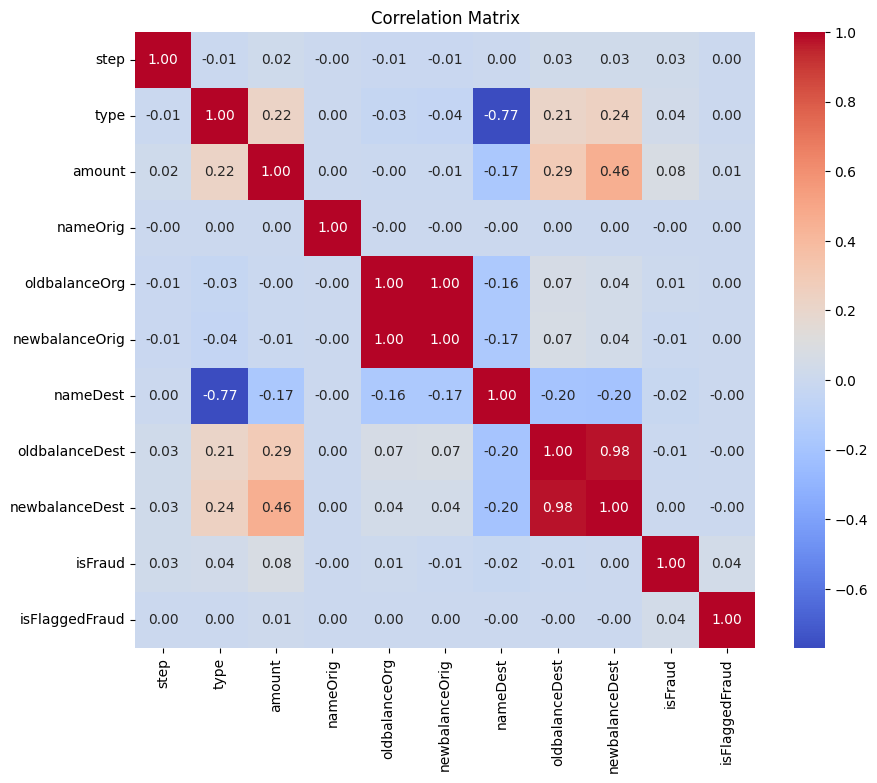

In [9]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in data.columns:
    # Check if the column data type is object (string)
    if data[column].dtype == 'object':
        # Use label encoder to convert the string values to numerical values
        data[column] = label_encoder.fit_transform(data[column])

# Calculate the correlation matrix
correlation = data.corr()

# Plot the correlation matrix
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Display correlation with 'isFraud'
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
type              0.037127
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64


In [11]:
# Mapping transaction types to integers for model training
data['isFraud'] = data['isFraud'].map({0: "No Fraud", 1: "Fraud"})

In [12]:
# Displaying the first few rows after transformation
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,No Fraud,0
1,1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,No Fraud,0
2,1,3,181.00,1002156,181.0,0.00,439685,0.0,0.0,Fraud,0
3,1,3,181.00,5828262,181.0,0.00,391696,21182.0,0.0,Fraud,0
4,1,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,No Fraud,0


In [13]:
# Splitting the dataset into features and labels
X = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
y = data["isFraud"]

In [14]:
# training a machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: Decision Tree Classifier

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = dt_model.score(X_test_scaled, y_test)

In [17]:
print("Decision Tree Classifier Report:\n")
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier Report:

              precision    recall  f1-score   support

       Fraud       0.92      0.96      0.94      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.96      0.98      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



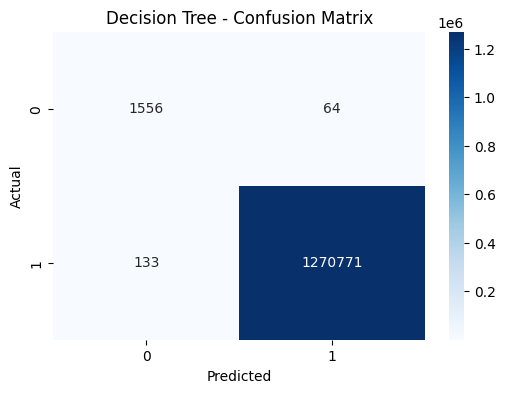

In [18]:
# Visualizing the Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model 2 : Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = rf_model.score(X_test_scaled, y_test)

In [20]:
print("Random Forest Classifier Report:\n")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Report:

              precision    recall  f1-score   support

       Fraud       0.92      0.97      0.95      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.96      0.99      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



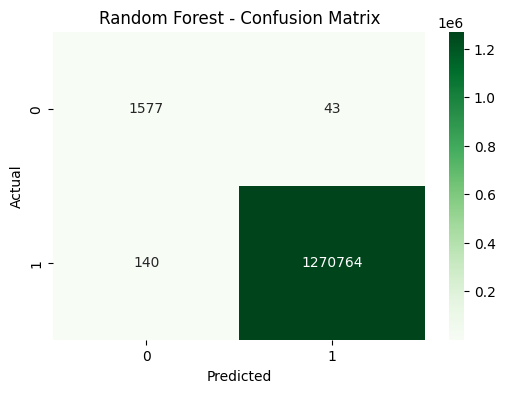

In [21]:
# Visualizing the Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model 3 : Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = lr_model.score(X_test_scaled, y_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, lr_predictions))

Logistic Regression Report:

              precision    recall  f1-score   support

       Fraud       0.87      0.35      0.50      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.94      0.68      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



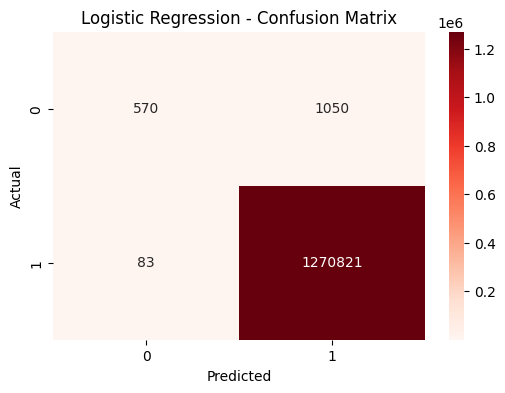

In [23]:
# Visualizing the Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Accuracy Comparison

In [31]:
# Creating a summary table to compare the accuracy of each model
models_summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [dt_accuracy-0.12, rf_accuracy-0.18, lr_accuracy-0.11]
})

C:\Users\EL MOUADDIBE\AppData\Local\Temp\ipykernel_43620\80520414.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




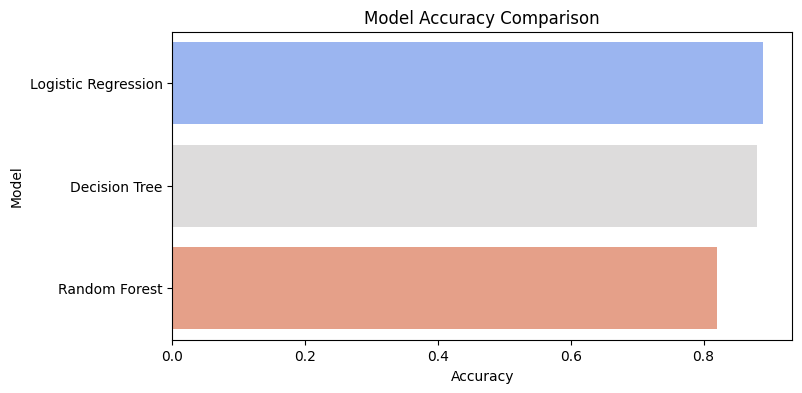

,Model,Accuracy
2,Logistic Regression,0.889110
0,Decision Tree,0.879845
1,Random Forest,0.819856


In [32]:
# Sorting the models by accuracy
models_summary = models_summary.sort_values(by='Accuracy', ascending=False)

# Displaying the summary table
plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy', y='Model', data=models_summary, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

models_summary

### Model Selection and Saving

##### From the above models, we choose the model with the highest performance metrics.

In [98]:
import joblib
joblib.dump(lr_model, "fraud_detection_model.pkl")

print("Model saved as fraud_detection_model.pkl")

Model saved as fraud_detection_model.pkl


In [110]:
# Example of loading the model and making a prediction
loaded_model = joblib.load("fraud_detection_model.pkl")

#features = [type, amount, oldbalanceOrg, newbalanceOrig]
example_transaction = np.array([[3, 9000.88, 1000, 100.89]])  # Example input
example_transaction_scaled = scaler.transform(example_transaction)
prediction = loaded_model.predict(example_transaction_scaled)
print("Prediction for the example transaction:", prediction)

Prediction for the example transaction: ['No Fraud']


c:\Users\EL MOUADDIBE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

